In [40]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import json
import pandas as pd

def read_json(f):
    f = open(f) 
    return json.load(f) 



# def plot_def(e_s,filename=None,  y_min=None,y_max=None,y =1.0, x_min=0,x_max =28, ):
#     plt.clf()
#     fig =plt.figure(figsize=(6,4))
#     overlapping = 0.150
    
#     ax_j =sns.lineplot(x =e_s["SIM"]["gt"] ,label ="GT",#,alpha=overlapping,
#                         y= e_s["SIM"]["gt"], linestyle='--',color="black" , linewidth=2
#                   )   
    

#     for key in e_s.keys():
#         ax_j =sns.lineplot(x =e_s[key]["gt"] ,label =key,#,alpha=overlapping,
#                         y= e_s[key]["e"], marker='o',
#                   #   errorbar="sd",
#                       )   
        
        
#     ax_j =sns.lineplot(x =e_s["SIM"]["gt"] ,label ="GT",#,alpha=overlapping,
#                         y= e_s["SIM"]["gt"], linestyle='--',color="black" , linewidth=1
#                   )   
#     plt.legend( title = "",fontsize=10)
#     plt.xlabel('O_inf', fontsize=13);
#     plt.ylabel("Estimate", fontsize=13);

#     plt.savefig(filename,bbox_inches='tight',dpi=300)

In [78]:
ESTIMATOR_COLORS = {
    "SIM": "mediumblue",
    "SIM_s": "limegreen",
    "MINE": "purple",
    "InfoNCE": "magenta",
    "NWJ": "orangered",
    "CLUB": "green",
}

# shown on plots
ESTIMATOR_NAMES = {
    "SIM":r'S$\Omega$I',
    "SIM_s":"SIM_s",
    "MINE": "Line-MINE",
    "InfoNCE": "Line-InfoNCE",
    "NWJ": "Line-NWJ",
    "CLUB": "Line-CLUB",

}


MARKers = {
    "SIM":'*',
    "SIM_s":"SIM_s",
    "MINE": ".",
    "InfoNCE": "v",
    "NWJ": "x",
    "CLUB": "d",

}


def plot_mi(
    results,
    estimator_colors=ESTIMATOR_COLORS,
    estimator_names=ESTIMATOR_NAMES,
    x_label=None,filename=None,
    plot_std: bool = False,
    alpha: float = 0.2,negatif =False
):
    fig, ax = plt.subplots(figsize=(4, 3)) 
    
    for key in results.keys():
        
        ax.plot(results[key]["gt"]
            ,results[key]["e"],
           # color=estimator_colors[key],
           marker=MARKers[key],markersize=5,
            label=estimator_names[key],
        )
        if plot_std:
            ax.fill_between(
                results[key]["gt"],
                results[key]["e"] - results[key]["std"],
                results[key]["e"] + results[key]["std"],
                #color=estimator_colors[key],
                alpha=alpha,
                label=None,
            )
    ax.plot(
        results["SIM"]["gt"],
        results["SIM"]["gt"],
        linestyle=":",
        color="black",
        label="GT",
    )
   
        
   

    #ax.set_ylim(bottom=bot,top=top)
    ax.set_xlabel(r'True $\Omega(X)$',fontsize=14)
    ax.set_ylabel(r'$\Omega(X)$ estimate',fontsize=14)
    matplotlib.rc('xtick', labelsize=13) 
    matplotlib.rc('ytick', labelsize=13)
    #plt.legend( title = "",fontsize=14,ncol=1)
    ax.legend = None
    # ax.legend(
    # loc="lower center", # "upper center" puts it below the line
    # ncol=3,fontsize=14,
    # bbox_to_anchor=(2, 2),
    # bbox_transform=fig.transFigure 
    # )
    plt.savefig(filename,bbox_inches='tight',dpi=300)


In [79]:
def gen_plots(path_dir,sigmas=None,seeds=[],setting=None,dim=None,met="o_inf"):
    gt = []
    e= []
    e_s = []
    std =[]
    std_s=[]
    for sigma in sigmas:
        sigma =str(sigma)
        val = []
        val_s = []
        for i, seed in enumerate( seeds ) :
            out=read_json(path_dir.format(seed,setting,dim,sigma))
            if  i ==0:
                gt.append(out[sigma] ["gt"][met])
            
            val.append(out[sigma] ["e"]["simple"][met])
            val_s.append(out[sigma] ["e"]["sigma"][met])
            # val.append(out[sigma] ["e"]["simple"]["tc"]-out[sigma] ["e"]["simple"]["dtc"])
            # val_s.append(out[sigma] ["e"]["sigma"]["tc"]-out[sigma] ["e"]["sigma"]["dtc"])
            
        e.append( np.mean(val) )
        e_s.append(np.mean(val_s))
        
        std.append(np.std(val))
        std_s.append(np.std(val_s))
        
    return {"gt":np.array(gt), "e":np.array(e), "std":np.array(std)
                }, {"gt":np.array(gt), "e":np.array(e_s), "std":np.array(std_s)}




def gen_plots_base(path_dir,sigmas=None,seeds=[],base=None,setting=None,dim=None,met = "o_inf"):
    gt = []
    e= []

    std =[]

    for sigma in sigmas:
        sigma =str(sigma)
        val = []
     
        for i, seed in enumerate( seeds ) :
            out=read_json(path_dir.format(base,seed,setting,dim,sigma))
            if  i ==0:
                gt.append(out[sigma] ["gt"][met])
            
            val.append(out[sigma] ["e"][met])
        
        e.append( np.mean(val) )

        std.append(np.std(val))

    
    return {"gt":np.array(gt), "e":np.array(e), "std":np.array(std)}

In [80]:
dims=[1,5,10,15,20]
setting = 0

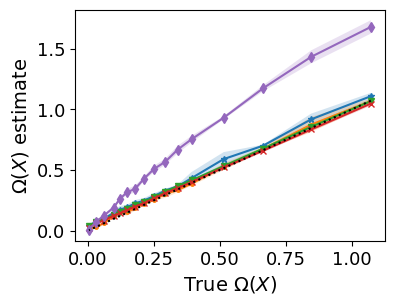

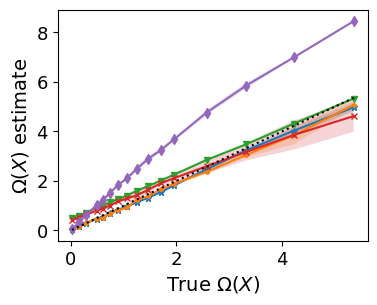

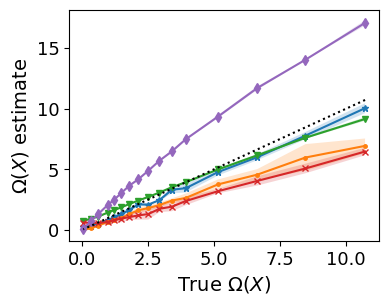

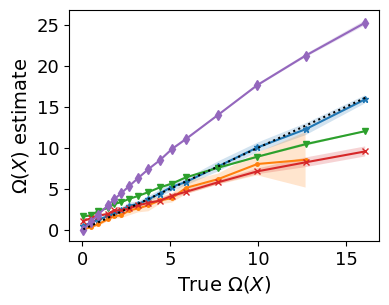

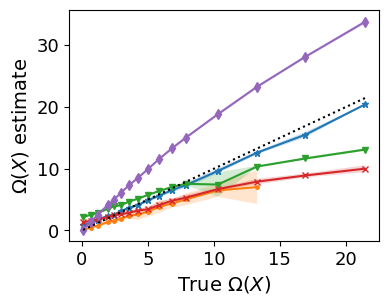

In [81]:
bench = "red"
path_sim = "/home/bounoua/work/pid/results/sim_2/red/seed_{}/setting_{}/dim_{}/rho{}.json"
path_b = "/home/bounoua/work/pid/results/baseline_2/red/model_{}/seed_{}/setting_{}/dim_{}/rho{}.json"


for dim in dims: 
    baselines = ["MINE","InfoNCE","NWJ","CLUB"]
    
    filename="plots/plot_{}_{}_dim_{}.jpg".format(bench,setting,dim)

    sigmas = [ 0.7 ,0.65, 0.6 ,0.55 ,0.5 ,0.475 ,0.45 ,0.425 ,0.4 ,0.375 , 0.35 ,0.325 ,0.3 ,0.25  ,0.2  ,0.1 ]

    results = {}
    seed = 33
    sim, sim_s = gen_plots(path_sim,
                           seeds= [11,22,33,55,77],
                           sigmas=sigmas,setting=setting,dim=dim)
   
    results ["SIM"] = sim
    #results ["SIM_s"] = sim_s
    seed = 42
    for base in baselines:
        
        results[base] = gen_plots_base(path_b,sigmas=sigmas,base=base,seeds=[42,44,33,22,77],setting=setting,dim=dim)

    #results["SIM_s"] = {"e":e_s,"gt":gt}
    
    plot_mi( results=results,filename=filename,plot_std=True)


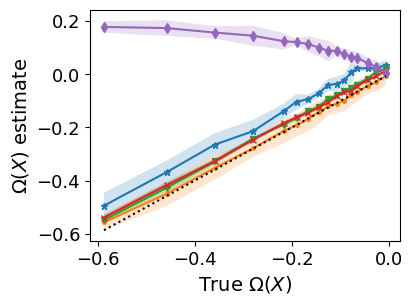

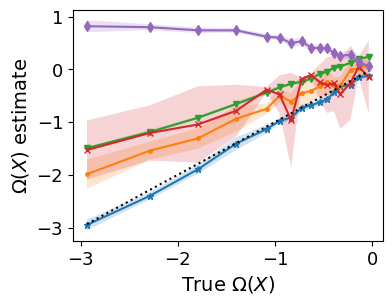

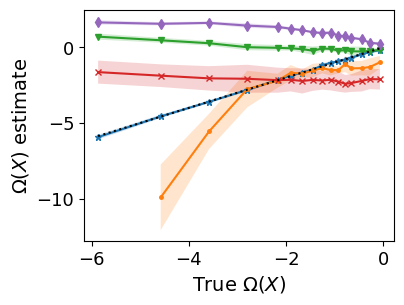

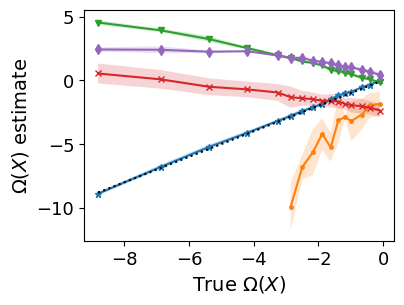

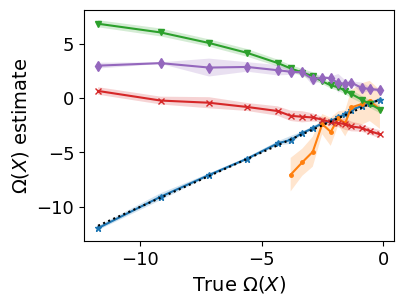

In [82]:
bench = "syn"
path_sim = "/home/bounoua/work/pid/results/sim_2/syn/seed_{}/setting_{}/dim_{}/rho{}.json"
path_b = "/home/bounoua/work/pid/results/baseline_2/syn/model_{}/seed_{}/setting_{}/dim_{}/rho{}.json"


for dim in dims: 
    baselines = ["MINE","InfoNCE","NWJ","CLUB"]
    
    filename="plots/plot_{}_{}_dim_{}.jpg".format(bench,setting,dim)

    sigmas = [ 0.7 ,0.65, 0.6 ,0.55 ,0.5 ,0.475 ,0.45 ,0.425 ,0.4 ,0.375 , 0.35 ,0.325 ,0.3 ,0.25  ,0.2  ,0.1 ]

    results = {}
    seed = 33
    sim, sim_s = gen_plots(path_sim,
                           seeds= [11,22,33,55,77],
                           sigmas=sigmas,setting=setting,dim=dim)
   
    results ["SIM"] = sim
    #results ["SIM_s"] = sim_s
    seed = 42
    for base in baselines:
        
        results[base] = gen_plots_base(path_b,sigmas=sigmas,base=base,seeds=[42,44,77,33,22],setting=setting,dim=dim)

    #results["SIM_s"] = {"e":e_s,"gt":gt}

    plot_mi( results=results,filename=filename,plot_std=True)


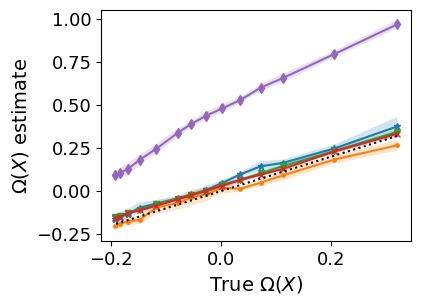

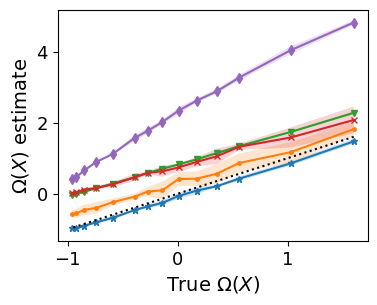

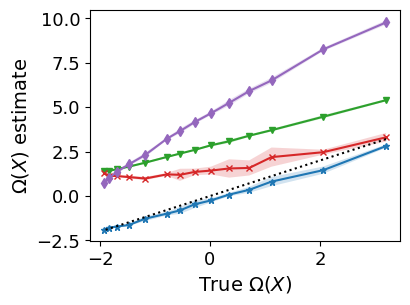

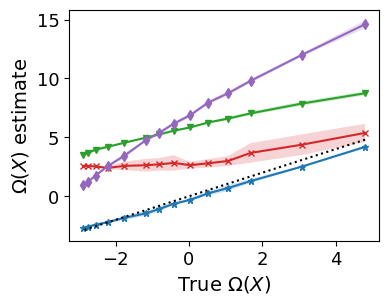

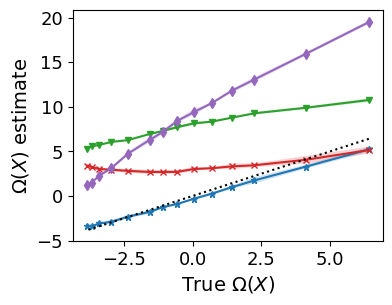

In [83]:
bench = "mix"
path_sim = "/home/bounoua/work/pid/results/sim_2/mix/seed_{}/setting_{}/dim_{}/rho{}.json"
path_b = "/home/bounoua/work/pid/results/baseline_2/mix/model_{}/seed_{}/setting_{}/dim_{}/rho{}.json"


for dim in dims: 
    baselines = ["MINE","InfoNCE","NWJ","CLUB"]
    #baselines = ["MINE","CLUB"]
    filename="plots/plot_{}_{}_dim_{}.jpg".format(bench,setting,dim)

    #sigmas = [0.75, 0.7, 0.6 , 0.55, 0.5 ,0.475 ,0.45, 0.425 ,0.4 , 0.375  ,0.35 , 0.3 , 0.25 , 0.2 ,0.15  ,0.1 ]
    sigmas = [ 0.6 , 0.55, 0.5 ,0.475 ,0.45, 0.425 ,0.4 , 0.375  ,0.35 , 0.3 , 0.25 , 0.2 ,0.15  ,0.1 ]

    results = {}
    seed = 33
    sim, sim_s = gen_plots(path_sim,
                           seeds= [11,22,33,55,77],
                           sigmas=sigmas,setting=setting,dim=dim)
   
    results ["SIM"] = sim
    #results ["SIM_s"] = sim_s
    seed = 42
    for base in baselines:
        
        results[base] = gen_plots_base(path_b,sigmas=sigmas,base=base,seeds=[42,44,22,33,77],setting=setting,dim=dim)

    #results["SIM_s"] = {"e":e_s,"gt":gt}

    plot_mi( results=results,filename=filename,plot_std=True)


In [47]:
# bench = "mix"
# path_sim = "/home/bounoua/work/pid/results/sim_2/mix/seed_{}/setting_{}/dim_{}/rho{}.json"
# path_b = "/home/bounoua/work/pid/results/mix/baseline_v0/model_{}/seed_{}/setting_{}/dim_{}/rho{}.json"
# met = "dtc"

# for dim in dims[:-2]: 
#     baselines = ["MINE","InfoNCE","NWJ","CLUB"]
    
#     filename="plots/plot_{}_{}_dim_{}.jpg".format(bench,setting,dim)

#     sigmas = [0.75, 0.7, 0.6 , 0.55, 0.5 ,0.475 ,0.45, 0.425 ,0.4 , 0.375  ,0.35 , 0.3 , 0.25 , 0.2 ,0.15  ,0.1 ]

#     results = {}
#     seed = 33
#     sim, sim_s = gen_plots(path_sim,
#                            seeds= [11,22,33,55,77],
#                            sigmas=sigmas,setting=setting,dim=dim,met =met)
   
#     results ["SIM"] = sim
#     results ["SIM_s"] = sim_s
#     seed = 42
#     for base in baselines:
        
#         results[base] = gen_plots_base(path_b,sigmas=sigmas,base=base,seeds=[42],setting=setting,dim=dim,met = met)

#     #results["SIM_s"] = {"e":e_s,"gt":gt}

#     plot_mi( results=results,filename=filename,plot_std=True)
